In [1]:
#setup
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import gensim

sns.set_theme()
plt.rcParams["figure.figsize"] = (10,8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from main import nlp_pipeline_result

In [3]:
"""
data_non_ner = nlp_pipeline_result(
    disable_ner=False,
    parameters={
        "remove_hashtag_word": True,
        "replace_politics": True,
        "replace_parties": True,
    }
)
data_non_ner['n_lemmas'] = data_non_ner['Lemmas'].str.split().str.len()

data_non_ner.to_csv('data/data.csv', index = False)
"""

'\ndata_non_ner = nlp_pipeline_result(\n    disable_ner=False,\n    parameters={\n        "remove_hashtag_word": True,\n        "replace_politics": True,\n        "replace_parties": True,\n    }\n)\ndata_non_ner[\'n_lemmas\'] = data_non_ner[\'Lemmas\'].str.split().str.len()\n\ndata_non_ner.to_csv(\'data/data.csv\', index = False)\n'

In [4]:
data = pd.read_csv('data/data.csv')


In [5]:


train = data.sample(frac = 0.8, random_state = 420)
test = data.drop(train.index)

print("Len data: ", len(data))
print("Len train: ", len(train))
print("Len test: ", len(test))


data = train

Len data:  14805
Len train:  11844
Len test:  2961


In [6]:
for i in range(0,50,10):
    display(data[i:i+10])

,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
7764,"26 largos años de deriva, de despropósitos pue...","26 largos años de deriva, de despropósitos pue...",0,1,Gema López Somoza,PSOE,largo año deriva despropósito encontrar M Gobi...,7
4583,@adoracionlvarez Confío en el pueblo de Madrid .,Confío en el pueblo de Madrid .,3,1,Odón Elorza González,PSE-EE-PSOE,confeír pueblo Madrid,3
1978,Tu “corta y pega” descontextualizado solo mues...,Tu “corta y pega” descontextualizado solo mues...,508,185,Mireia Borrás Pabón,Vox,corto pegar descontextualizado mostrar calaña ...,14
6585,"Sra Montero, devuelva ya los 2.500 MM€ del IVA...","Sra Montero, devuelva ya los 2.500 MM€ del IVA...",220,146,Antonio González Terol,PP,Sra Montero devolver IVA adeudar CCAA Supremo ...,17
417,Marlaska está más preocupado en acercar asesin...,Marlaska está más preocupado en acercar asesin...,572,355,Francisco José Alcaraz Martos,Vox,Marlaska preocupado acercar asesino ETA proteg...,8
2136,Desgarradora noticia desde La Bisbal del Pened...,Desgarradora noticia desde La Bisbal del Pened...,140,96,Carmen Calvo Poyato,PSOE,desgarrador noticia Bisbal Penedès Tarragona m...,14
13854,@PedroMorenoGmz @abrilenparis @canuto6969 @Vox...,"Ay que te quiero, Pedro! Aprende, 😈",5,0,Carla Toscano de Balbín,Vox,querer Pedro Aprende,3
9347,Porque @BalEdmundo será el presidente del Madr...,Porque será el presidente del Madrid de todos....,195,64,María Muñoz Vidal,Ciudadanos,presidente Madrid Cs único opción garantizar g...,15
14036,¿Os acordais cuando nos enseñaban que la avari...,¿Os acordais cuando nos enseñaban que la avari...,298,69,Roberto Uriarte Torrealday,Unidas Podemos,acordais enseñar avaricia pecado capital cambi...,8
8573,En #venezuela han negado incluso la posibilida...,En han negado incluso la posibilidad de dormir...,2,2,María Valentina Martínez Ferro,PP,negar posibilidad dormir Libertad aprovechen h...,10


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
14261,@Laura32sa @Congreso_Es ✊🏻✊🏻✊🏻,✊🏻✊🏻✊🏻,1,2,Mireia Vehí Cantenys,CUP-PR,NaN,0
5283,"Datos. Facta, non verba.","Datos. Facta, non verba.",151,69,Aitor Esteban Bravo,EAJ-PNV,Datos Facta non verbo,4
2521,Que dice Pablete que La Casa Real no ha conden...,Que dice Pablete que La Casa Real no ha conden...,4,2,Inés María Cañizares Pacheco,Vox,Pablete Casa Real condenar,4
2311,@SBuabentV @LGTBPSOE @PSOE @psoe_m Has estado ...,"PSOE Has estado genial, como eres. Fantástica ...",3,3,Pilar Cancela Rodríguez,PSdeG-PSOE,PSOE Has genial fantástico genuín,5
9518,@NadiaBP71 Nadia! Preciosa😍💛,Nadia! Preciosa😍💛,15,2,Míriam Nogueras i Camero,JxCAT,Nadia Preciosa,2
5276,"Elecciones generales 2019:En Fuenlabrada, joya...","Elecciones generales 2019:En Fuenlabrada, joya...",5673,1974,Iván Espinosa de los Monteros de Simón,Vox,elección general Fuenlabrada joya corona socia...,17
6159,Felicidades @unicef_es,Felicidades,1,2,Alicia García Rodríguez,PP,felicidad,1
11329,En el #DiaMundialHemofilia todo nuestro apoyo ...,"En el todo nuestro apoyo a los enfermos, famil...",16,7,Carmen Riolobos Regadera,PP,apoyo enfermo familiar Asociaciones Federación...,8
12731,"Discuta los datos, y luego hablamos del diseño...","Discuta los datos, y luego hablamos del diseño...",123,36,Víctor Manuel Sánchez del Real,Vox,discutar dato hablar diseño moralidad dato,6
3158,Gracias también a tod@s los que lo hacen posible!,Gracias también a los que lo hacen posible!,21,13,Pedro Casares Hontañón,PSOE,gracias,1


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
7624,Dice Almeida que el ha pactado con VOX en Madr...,Dice Almeida que el ha pactado con VOX en Madr...,75,48,Juan Antonio López de Uralde Garmendia,Unidas Podemos,Almeida pactar VOX Madrid dejar ancha extender...,10
5228,La ley de Pablo Iglesias que pretende hacerse ...,La ley de Pablo Iglesias que pretende hacerse ...,2284,1054,Iván Espinosa de los Monteros de Simón,Vox,ley Pablo Iglesias pretender hacer él control ...,20
1185,Cuando declinaron hacer enmiendas en los Presu...,Cuando declinaron hacer enmiendas en los Presu...,18,4,Francisco Aranda Vargas,PSC,declinar enmienda Presupuestos sospechar,4
2019,La ciudadanía nos pide que ejerzamos la mejor ...,La ciudadanía nos pide que ejerzamos la mejor ...,1,1,Helena Caballero Gutiérrez,PSOE,ciudadanía pedir ejerzamos política poner dero...,11
11036,"Con @bertrandndongo5 y @rromerovilches, espera...",Con y esperando un café y que empiece el mitin de,198,55,José Ramírez del Río,Vox,esperar café empiecir mitin,4
8440,@RuthGoni @jgstegmann @PabloIglesias @Albert_R...,Totalmente de acuerdo. Pero se va,6,0,Marta Martín Llaguno,Ciudadanos,NaN,0
9866,"GRACIAS #SanBlasCanillejas. ¡Vamos, Madrid! #Y...","GRACIAS ¡Vamos, Madrid!",1489,420,Macarena Olona Choclán,Vox,Madrid,1
5920,El #4M va a ser un punto de inflexión para el ...,El va a ser un punto de inflexión para el PP y...,429,204,Teodoro García Egea,PP,punto inflexión PP anticipo ocurrir comunidad ...,7
7475,Buenos días y mucha esperanza...,Buenos días y mucha esperanza...,0,2,Fuensanta Lima Cid,PSOE,esperanza,1
7154,‼️🇪🇸 simplemente impresionante ayer en #Monclo...,‼️🇪🇸 simplemente impresionante ayer en con sin...,8,2,Rodrigo Jiménez Revuelta,Vox,impresionante sincero transparente inconmensur...,4


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
2107,El esperanzador discurso de Santiago Abascal d...,El esperanzador discurso de Santiago Abascal d...,18,9,Pablo Juan Calvo Liste,Vox,esperanzador discurso Santiago Abascal Asamble...,7
6525,Las CCAA relanzan su exigencia de hasta 2.500 ...,Las CCAA relanzan su exigencia de hasta 2.500 ...,15,5,Víctor González Coello de Portugal,Vox,CCAA relanzar exigencia millón mes IVA retener...,22
13063,El Gobierno de España modifica la ley d consum...,El Gobierno de España modifica la ley d consum...,5,4,Marisol Sánchez Jódar,PSOE,Gobierno España modificar ley consumidor ampli...,21
8241,"@carlcandel No sé de qué habla, sinceramente. ...","No sé de qué habla, sinceramente. Muestro dato...",0,0,Pau Mari Klose,PSOE,mostrar dato lectura expóngalo ahorresar calif...,6
3195,📻 Los compromisos del Gobierno de @sanchezcast...,📻 Los compromisos del Gobierno de en están ava...,29,19,Pedro Casares Hontañón,PSOE,compromiso Gobierno avanzar licitación Desfild...,13
6455,“Bruselas a Yolanda Díaz: acoge positivamente ...,“Bruselas a Yolanda Díaz: acoge positivamente ...,79,42,Antonio Gómez-Reino Varela,En Común,Bruselas Yolanda Díaz acoger reforma laboral p...,17
7198,"Mañana, las tabernas de Madrid a rebosar de v...","Mañana, las tabernas de Madrid a rebosar de vo...",209,46,María Teresa Jiménez-Becerril Barrio,PP,taberna Madrid rebosar votante celebrar pedazo...,10
10380,Que viene el lobo (de Vox) y la loba (de Ayuso...,Que viene el lobo (de Vox) y la loba (de Ayuso...,4,1,María Mercè Perea i Conillas,PSC,venir lobo Vox loba Ayuso invitar leer acertad...,10
4697,⭕️ Tras el dictamen de la EMA sobre la vacuna ...,⭕️ Tras el dictamen de la EMA sobre la vacuna ...,73,25,Odón Elorza González,PSE-EE-PSOE,dictamen EMA vacuna AstraZeneca ciudadanía nec...,13
8339,Han convertido a TVE en una agencia de colocac...,Han convertido a TVE en una agencia de colocac...,2652,1044,Manuel Mariscal Zabala,Vox,convertir TVE agencia colocación intoxicador m...,12


,Original Tweets,Parsed Tweets,Likes,Retweets,Author,Party,Lemmas,n_lemmas
11960,"No , Iglesias es un embustero. No creemos nada...","No , Iglesias es un embustero. No creemos nada...",232,71,Agustín Rosety Fernández de Castro,Vox,Iglesias embustero creer investigar carga oler...,7
8777,Si Netflix hiciera una serie de cómo han funci...,Si Netflix hiciera una serie de cómo han funci...,3746,1710,Rafael Mayoral Perales,Unidas Podemos,Netflix hacer serie funcionar cloaca país tild...,9
2298,@PerePauUn2 @GaboDua @territorialgob @miquelic...,Entendo,1,1,Pilar Cancela Rodríguez,PSdeG-PSOE,Entendo,1
11154,#1Mayo2021 desde el @PSOE seguiremos luchando ...,desde el PSOE seguiremos luchando por sus dere...,22,8,Elvira Ramón Utrabo,PSOE,PSOE seguir luchar derecho,4
14487,"Que no, que ni somos lo mismo, ni los extremos...","Que no, que ni somos lo mismo, ni los extremos...",725,364,Noelia Vera Ruíz-Herrera,Unidas Podemos,extremo tocar mayo quedar urna compañera Madri...,11
5882,Una vez más defendiendo en nombre del @GPPopul...,Una vez más defendiendo en nombre del PP medid...,4,3,Joaquín María García Díez,PP,defender nombre PP medida paliar falta mando e...,19
6272,La presentadora-activista Barceló sale trasqui...,La presentadora-activista Barceló sale trasqui...,66,43,Luis Gestoso de Miguel,Vox,Barceló salir trasquilado paso expulsar abruma...,18
3397,"1) ""No existe la ""emergencia climática"". La ún...","1) ""No existe la ""emergencia climática"". La ún...",76,33,Francisco José Contreras Peláez,Vox,emergencia climático único emergencia sacar Go...,19
7193,Y eso es lo que los madrileños han defendido y...,Y eso es lo que los madrileños han defendido y...,94,23,María Teresa Jiménez-Becerril Barrio,PP,madrileño defender español defender vivir comu...,9
12018,"Los ""intelectuales"" comunistas nunca han podid...","Los ""intelectuales"" comunistas nunca han podid...",85,38,Agustín Rosety Fernández de Castro,Vox,intelectual comunista ocultar desprecio clase ...,14


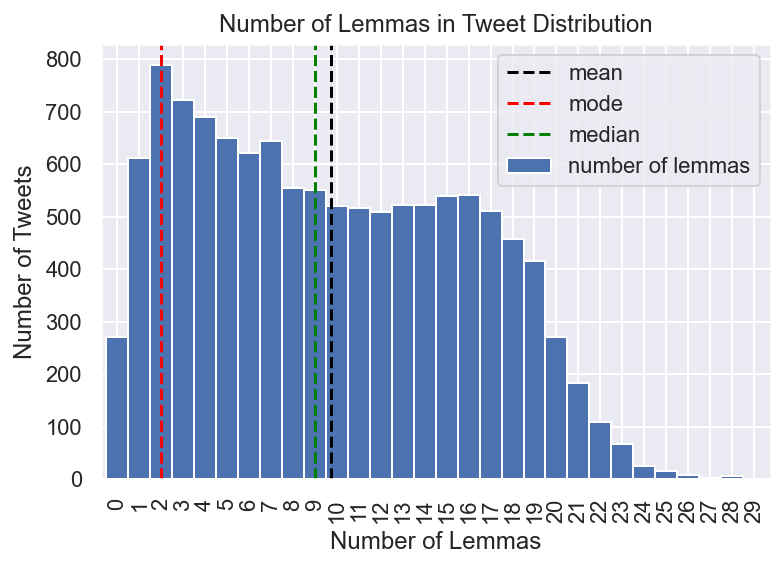

In [7]:
plt.figure()
data['n_lemmas'].value_counts().sort_index().plot(kind="bar",width=1,label='number of lemmas')
plt.axvline(x = data['n_lemmas'].mean(),label='mean',color = 'black',linestyle = '--')
plt.axvline(x = data['n_lemmas'].mode()[0],label='mode',color = 'red',linestyle = '--')
plt.axvline(x = data['n_lemmas'].median(),label='median',color = 'green',linestyle = '--')
plt.legend()
plt.title('Number of Lemmas in Tweet Distribution')
plt.xlabel('Number of Lemmas')
plt.ylabel('Number of Tweets')
plt.show()

In [8]:
data = data[data['n_lemmas']>=3]
print('Number of Tweets in Dataframe after removing short tweets:', len(data))

Number of Tweets in Dataframe after removing short tweets: 10172


In [9]:
tweets_corpus = data["Lemmas"].tolist()
# tweets_corpus = list(set(tweets_corpus))
tweets_corpus = [el.split() for el in tweets_corpus]

# display(tweets_corpus)

In [10]:
from gensim.corpora import Dictionary

token_dic = Dictionary(tweets_corpus)


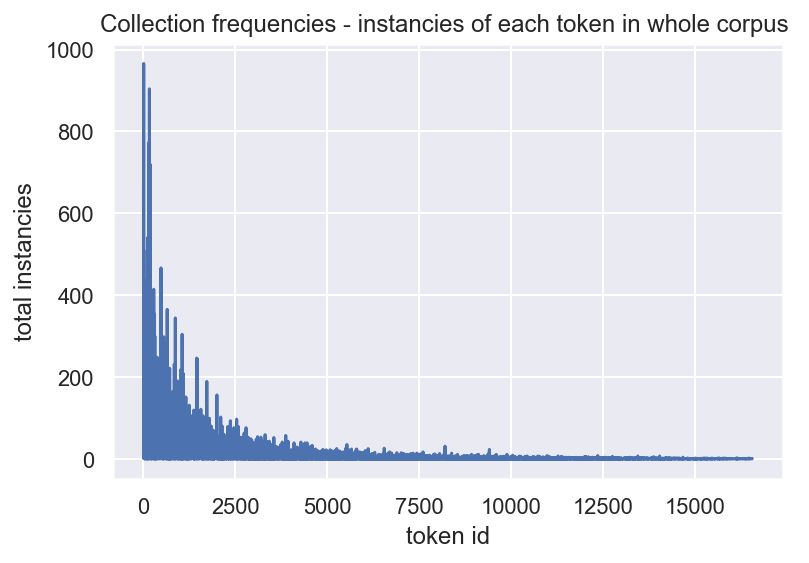

Max of occurances per topic:  966
Mean of occurances per topic:  6.830010873504893


In [11]:
# Collection frequencies: token_id -> how many instances of this token are contained in the documents.

collfreq = token_dic.cfs.items()
collfreq = sorted(collfreq) 
x, y = zip(*collfreq) 
plt.plot(x, y)
plt.title('Collection frequencies - instancies of each token in whole corpus ')
plt.xlabel('token id')
plt.ylabel('total instancies')
plt.show()



# MEAN

count = 0
_sum = 0
for key in token_dic.cfs:
    count += 1
    _sum += token_dic.cfs[key]

instances_mean = _sum/count



#MAX

instances_max = max(token_dic.cfs.values())





print("Max of occurances per topic: ",instances_max )
print("Mean of occurances per topic: ",instances_mean )






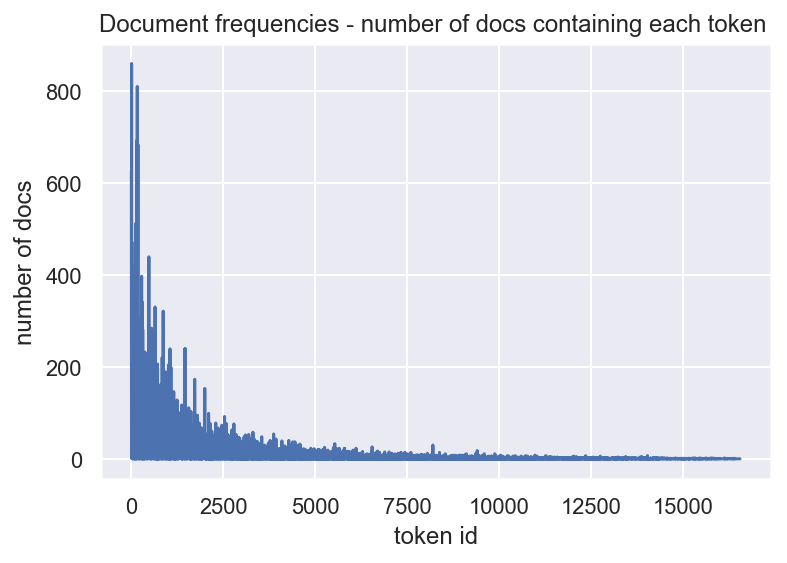

Max of docs in which a token appears:  860
Mean of docs in which token appears:  6.5962305183037335


In [12]:
# Document frequencies: token_id -> how many documents contain this token


docfreq = token_dic.dfs.items()
docfreq = sorted(docfreq) 
j, k = zip(*docfreq) 
plt.plot(j, k)
plt.title('Document frequencies - number of docs containing each token ')
plt.xlabel('token id')
plt.ylabel('number of docs')
plt.show()



# MEAN

count = 0
_sum = 0
for key in token_dic.dfs:
    count += 1
    _sum += token_dic.dfs[key]

docs_mean = _sum/count



#MAX

docs_max = max(token_dic.dfs.values())





print("Max of docs in which a token appears: ",docs_max )
print("Mean of docs in which token appears: ",docs_mean )



In [13]:
#FILTER TOKEN DICTIONARY




no_below_list = [1,2,3,4,5,6,7,8,9,10] #Minimum number of documents to keep a term in the dictionary
no_above_list = [.5, .4, .3, .2, .05, .04, .03, .02, .005, .004, .003, .002, .0005, .0004, 0.0003, .0002] #Maximum proportion of documents in which a term can appear to be kept in the dictionary

prev_dic = copy.copy(token_dic)
prev_tokens = len(token_dic)


# print('The dictionary contained', prev_tokens, 'terms')

# for i in no_below_list:
    
#     for j in no_above_list:
        
#         token_dic = Dictionary(tweets_corpus)
        
#         token_dic.filter_extremes(no_below=i,no_above=j)
        
#         n_tokens = len(token_dic)
        
#         print(n_tokens, 'terms |no_below = ', i, "| no_above = ", j)



#print('First terms in the dictionary:')
#for n in range(500):
#    print(str(n), ':', token_dic[n])#FILTER TOKEN DICTIONARY



In [14]:
token_dic.filter_extremes(no_below=3,no_above=0.003)
# for n in range(500):
#     print(str(n), ':', token_dic[n])#FILTER TOKEN DICTIONARY

print('The dictionary contains', len(token_dic), 'terms')


The dictionary contains 4750 terms


In [15]:

# BOW: Transform list of tokens into list of tuples (token id, token # of occurrences)

tweets_corpus_bow = [token_dic.doc2bow(doc) for doc in tweets_corpus]

# tweets_corpus_bow

In [16]:
from gensim.models.wrappers import LdaMallet
import os

os.environ['MALLET_HOME'] = r'C:/mallet'
mallet_path = 'C:/mallet/bin/mallet'
# mallet_path = '/Users/bernardobouzas/Downloads/mallet-2.0.8/bin/mallet'

ldamallet = LdaMallet(
    mallet_path,
    corpus=tweets_corpus_bow,
    num_topics=20,
    id2word=token_dic,
    alpha=5,
    iterations=100
)

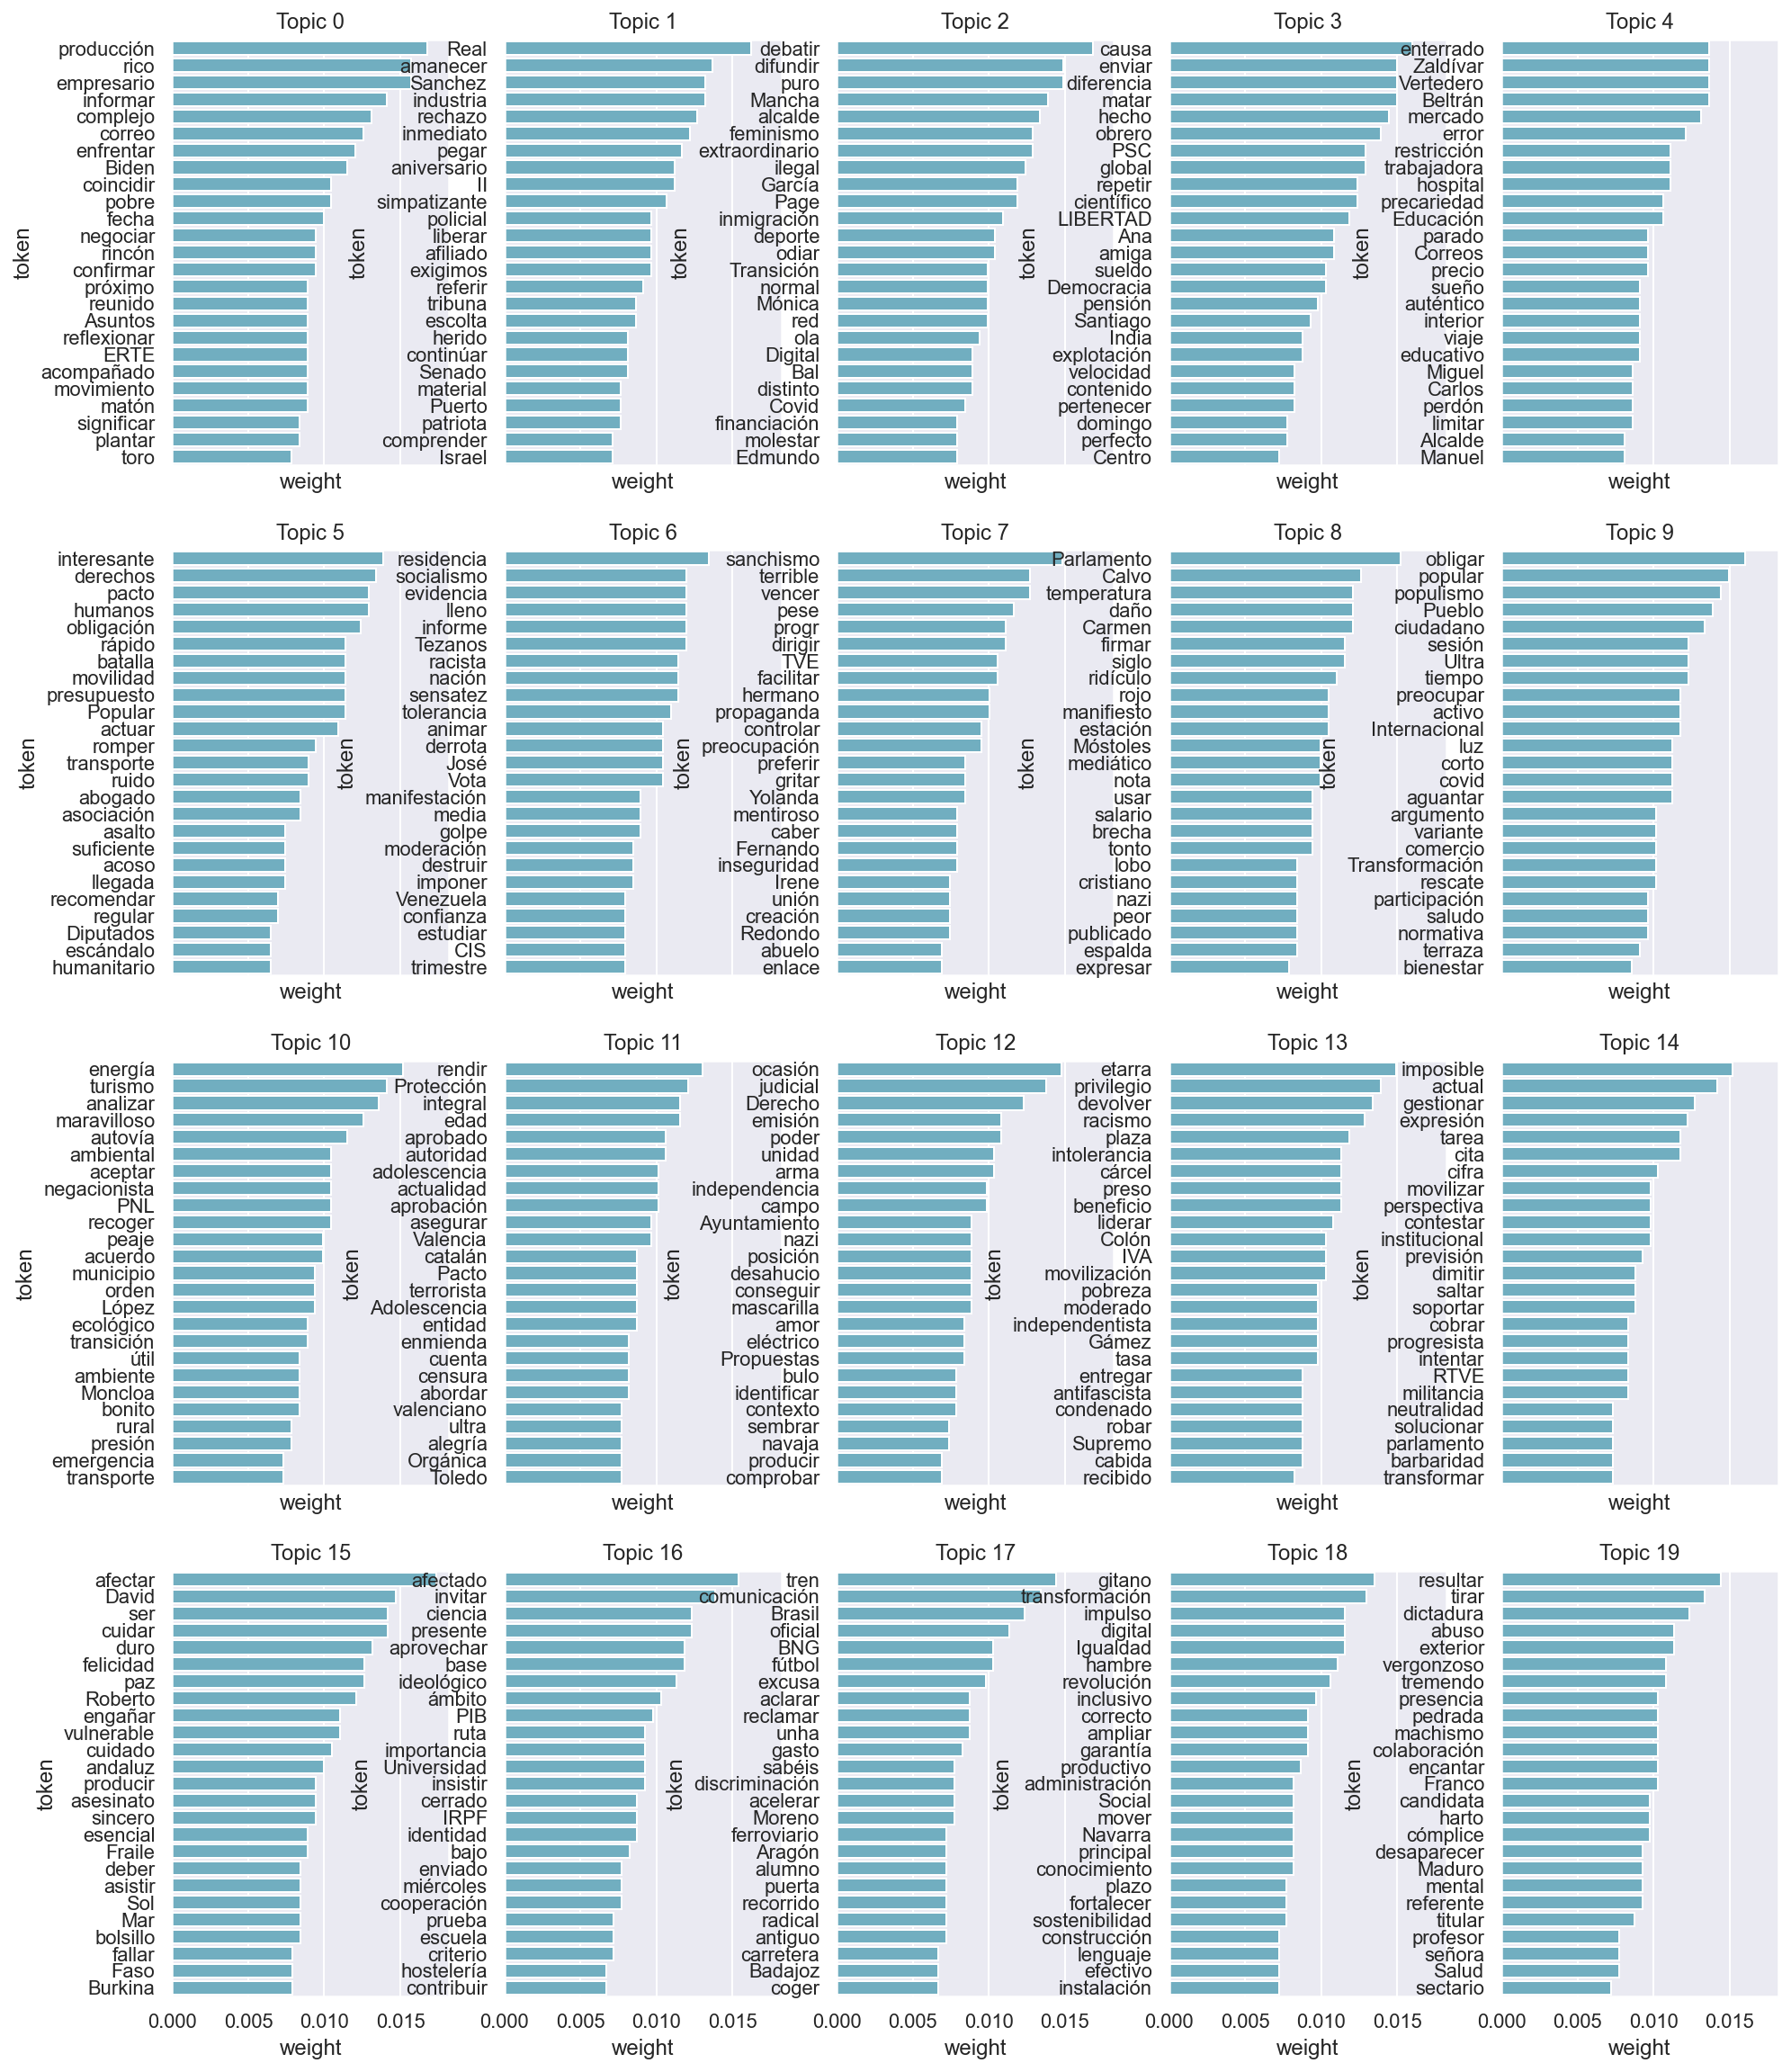

In [17]:
topn = 25

fig, axes = plt.subplots(4, 5, figsize=(16, 20), sharex=True)

for i in range(5):

    # Build a dataframe with columns 'token' and 'weight' for topic i
    df = pd.DataFrame(ldamallet.show_topic(i, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[0][i])
    axes[0][i].set_title('Topic ' + str(i))
    # Build a dataframe with columns 'token' and 'weight' for topic i + 5
    df = pd.DataFrame(ldamallet.show_topic(i+5, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[1][i])
    axes[1][i].set_title('Topic ' + str(i+5))
    # Build a dataframe with columns 'token' and 'weight' for topic i + 10
    df = pd.DataFrame(ldamallet.show_topic(i+10, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[2][i])
    axes[2][i].set_title('Topic ' + str(i+10))
    # Build a dataframe with columns 'token' and 'weight' for topic i + 15
    df = pd.DataFrame(ldamallet.show_topic(i + 15, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[3][i])
    axes[3][i].set_title('Topic ' + str(i + 15))
    
plt.show()

In [18]:
# print(list(ldamallet.load_document_topics()))
# print(len(list(ldamallet.load_document_topics())))


rec = []
for topic in ldamallet.load_document_topics():
    rec.append([value[1] for value in topic])
       
df = pd.DataFrame(rec)

print(len(df),len(data))

df['Likes'] = data["Likes"]
df['Retweets'] = data["Retweets"]
df["Party"] = data["Party"]
df

10172 10172


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Likes,Retweets,Party
0,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.156250,0.031250,0.156250,0.156250,...,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,NaN,NaN,NaN
1,0.035714,0.035714,0.178571,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,770.0,326.0,PSOE
2,0.022727,0.113636,0.113636,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.295455,...,0.022727,0.113636,0.022727,0.022727,0.022727,0.022727,0.022727,653.0,222.0,PSOE
3,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231,0.019231,0.096154,0.019231,...,0.403846,0.096154,0.019231,0.019231,0.096154,0.019231,0.019231,167.0,77.0,PSOE
4,0.035714,0.035714,0.035714,0.035714,0.178571,0.035714,0.035714,0.178571,0.035714,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10167,0.027778,0.138889,0.027778,0.027778,0.027778,0.027778,0.250000,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.138889,0.027778,0.027778,NaN,NaN,NaN
10168,0.017857,0.017857,0.017857,0.160714,0.017857,0.017857,0.017857,0.303571,0.017857,0.017857,...,0.017857,0.017857,0.232143,0.017857,0.017857,0.017857,0.017857,0.0,0.0,PP
10169,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.178571,0.035714,...,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,61.0,22.0,PP
10170,0.027778,0.027778,0.138889,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.138889,0.138889,0.027778,0.027778,0.027778,NaN,NaN,NaN
